"""Feature Detection and Matching

Based on: https://docs.opencv.org/4.6.0/dc/dc3/tutorial_py_matcher.html
"""

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# Read images
img1 = cv2.imread("box.png")  # objects: box.png, book.png, basmati.png
img2 = cv2.imread("scene.png")
print ("Image 1 size: {}x{}".format(img1.shape[1], img1.shape[0]))
print ("Image 2 size: {}x{}".format(img2.shape[1], img2.shape[0]))
cv2.imshow("Image 1", img1)
cv2.imshow("Image 2", img2)

Image 1 size: 432x297
Image 2 size: 683x512


In [3]:
# Convert to grayscale
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Initiate SIFT detector
sift = cv2.SIFT_create()


In [4]:
# find the keypoints and descriptors with ORB
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
print ("Image 1: {} keypoints found".format(len(kp1)))
print ("Image 2: {} keypoints found".format(len(kp2)))


Image 1: 1368 keypoints found
Image 2: 2202 keypoints found


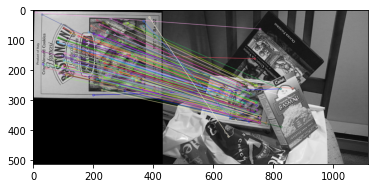

(<matplotlib.image.AxesImage at 0x7fdb64683d60>, None)

In [5]:
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()